In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_video_path = cv2.VideoCapture(r'C:\Users\sachi\Downloads\object_tracking.mp4')

x_centers = []
y_centers = []

frame_count = 0
frame_500 = None
while True:
    # Extracting frame from the video file
    ret, frame = output_video_path.read()
    if ret == False:
        print("Video ended")
        break

    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Create a window to display the video feed
    cv2.namedWindow("Video Feed", cv2.WINDOW_NORMAL)
    
    # Set the size of the window
    cv2.resizeWindow("Video Feed", 1000, 600)

    # Create array of all the white pixels i.e. value 1
    non_zero = np.array(np.nonzero(np.logical_not(gray_image)))
    # non_zero = np.array(np.where(gray_image = 0))

    # Find min and max of x and y coordinates of red pixels
    if np.any(non_zero):

        min_x = np.min(non_zero[1])
        min_y = np.min(non_zero[0])
        max_x = np.max(non_zero[1])
        max_y = np.max(non_zero[0])

        # Take mean to calculate center pixels
        center_x = int((max_x + min_x) / 2)
        x_centers.append(center_x)

        center_y = int((max_y + min_y )/ 2)
        y_centers.append(center_y)

        # Draw center at the center of the ball in each frame
        center = (center_x, center_y)

        cv2.circle(frame, center, 5, (0, 255, 0), -1) 

        # Display the 100th frame using Matplotlib
    if frame_count == 499:
        frame_500 = frame
        
    frame_count +=1

    cv2.imshow("Video Feed", frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the output video writer
output_video_path.release()
# Close OpenCV windows
cv2.destroyAllWindows()


Video ended


In [7]:
Y = np.array(y_centers)
print(Y.shape)
x_centers = np.array(x_centers)
print(x_centers.shape)

# Squaring and adding X terms to fit the equation
x_center_squared = np.array([num**2 for num in x_centers]).reshape(-1,1)
ones = np.ones(x_centers.shape[0]).reshape(-1,1)
print(x_center_squared.shape)

# Writing the equation y = ax**2 + b*x + c in matrix format B = inverse(X.T * X) (X.T * Y)
X = np.column_stack((x_center_squared, x_centers, ones))
print(X.shape)

B = np.linalg.inv(X.T @ X) @ (X.T @ Y)
print(B)

(514,)
(514,)
(514, 1)
(514, 3)
[ 6.45520710e-04 -1.24751816e+00  9.93242111e+02]


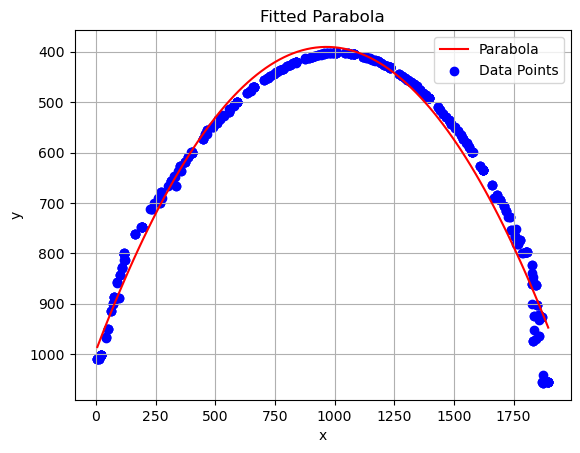

In [8]:
# Define the coefficients obtained from the regression analysis
a, b, c = B

# Generate x values for the plot
x_values = np.linspace(max(x_centers), min(x_centers), 100)

# Calculate corresponding y values using the equation y = ax^2 + bx + c
y_values = a * x_values**2 + b * x_values + c

# Plot the parabola
plt.plot(x_values, y_values, color='red', label='Parabola')
plt.scatter(x_centers, y_centers, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Parabola')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [9]:
# Given that X = 1000 to find out the Y value based on the obtained parabola fitted curve equation
# We provide x_values = 1000 for the equation with parameters a, b, c
print(f'a = {a}, b = {b}, c = {c}') 
x_value = 1000
# Inserting the parameter values to obtain Y
y_value = a * x_value**2 + b * x_value + c
print(f'The position of object on Y_axis = {y_value}')

a = 0.0006455207101212831, b = -1.2475181568473523, c = 993.2421107022183
The position of object on Y_axis = 391.2446639761489


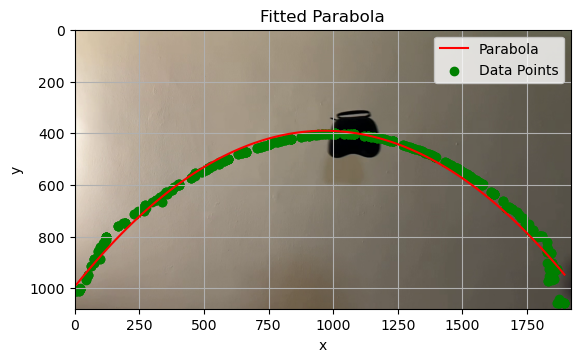

In [12]:
plt.imshow(cv2.cvtColor(frame_500, cv2.COLOR_BGR2RGB))
# Generate x values for the plot
x_values = np.linspace(max(x_centers), min(x_centers), 100)

# Calculate corresponding y values using the equation y = ax^2 + bx + c
y_values = a * x_values**2 + b * x_values + c

# Plot the parabola
plt.plot(x_values, y_values, color='red', label='Parabola')
plt.scatter(x_centers, y_centers, color='green', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Parabola')
plt.legend()
plt.grid(True)
plt.show()